In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob # To combine csv's together
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Bring in hard drive dataset
# Only doing the month of February as all 3 months are too much for my laptop :/
df_raw_01 = pd.concat(map(pd.read_csv, 
                   glob.glob(r'C:/Users/Kenei/OneDrive/Documents/GitHub/Thinkful/Data/DriveStats/drive_stats_2019_Q1/01/*.csv')))

In [3]:
# Bring in hard drive dataset
# Only doing the month of February as all 3 months are too much for my laptop :/
df_raw_02 = pd.concat(map(pd.read_csv, 
                   glob.glob(r'C:/Users/Kenei/OneDrive/Documents/GitHub/Thinkful/Data/DriveStats/drive_stats_2019_Q1/02/*.csv')))

In [4]:
# Bring in hard drive dataset
# Only doing the month of February as all 3 months are too much for my laptop :/
df_raw_03 = pd.concat(map(pd.read_csv, 
                   glob.glob(r'C:/Users/Kenei/OneDrive/Documents/GitHub/Thinkful/Data/DriveStats/drive_stats_2019_Q1/03/*.csv')))

In [5]:
df_raw = pd.concat([df_raw_01, df_raw_02, df_raw_03], ignore_index=True)

In [7]:
df_raw.to_csv('drive_stats_2019_Q1_full.csv')

In [4]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-02-01,Z305B2QN,ST4000DM000,4000787030016,0,120.0,243327784.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,82.0,174450320.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,79.0,72195960.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,79.0,74302712.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The capacity_bytes column is looking weird.  The problem is that while the data is an unsigned 64-bit integer, the memory representation has been interpreted as a double.  The function 'unmangle_float' reverses this process.

In [14]:
# Noticed capacity_bytes is in a weird format.
import struct

cap = df.capacity_bytes

def unmangle_float(x):
    return struct.unpack('<Q', struct.pack('>d', x))[0]

cap.map(unmangle_float)

0           1009503735106
1                13935938
2                13935938
3                13935938
4           1009503735106
               ...       
105161      1009503735106
105162    141102713445698
105163           13935938
105164      1009503735106
105165      1009503735106
Name: capacity_bytes, Length: 2945987, dtype: int64

In [15]:
df.capacity_bytes = df.capacity_bytes.map(unmangle_float)

In [16]:
# Descriptive Statistics Summary
df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,2.945987e+06,2.945987e+06,2.945745e+06,2.945745e+06,631095.000000,631095.000000,2.945157e+06,2.945157e+06,2.945157e+06,2.945157e+06,...,28.0,2.800000e+01,28.000000,28.000000,28.0,28.0,4635.000000,4635.0,0.0,0.0
mean,3.698964e+13,4.718283e-05,9.308685e+01,9.564738e+07,129.800981,78.797244,9.715516e+01,2.092867e+02,9.999849e+01,8.161652e+00,...,1.0,1.858047e+06,57.571429,9366.607143,100.0,0.0,106.645092,0.0,NaN,NaN
std,6.164148e+13,6.868815e-03,1.739950e+01,8.038431e+07,23.866596,43.836921,1.058199e+01,1.035346e+03,1.221857e-01,1.287540e+02,...,0.0,1.031398e+06,49.891310,4557.424795,0.0,0.0,24.909552,0.0,NaN,NaN
min,6.163100e+04,0.000000e+00,5.000000e+01,0.000000e+00,86.000000,0.000000,7.900000e+01,0.000000e+00,7.500000e+01,1.000000e+00,...,1.0,7.547400e+04,1.000000,304.000000,100.0,0.0,100.000000,0.0,NaN,NaN
25%,1.393594e+07,0.000000e+00,8.100000e+01,8.930608e+06,133.000000,96.000000,9.200000e+01,0.000000e+00,1.000000e+02,3.000000e+00,...,1.0,1.135181e+06,1.000000,6799.750000,100.0,0.0,100.000000,0.0,NaN,NaN
50%,1.009504e+12,0.000000e+00,8.300000e+01,8.855914e+07,134.000000,101.000000,9.600000e+01,0.000000e+00,1.000000e+02,5.000000e+00,...,1.0,1.784168e+06,100.000000,9602.500000,100.0,0.0,100.000000,0.0,NaN,NaN
75%,1.411027e+14,0.000000e+00,1.000000e+02,1.680949e+08,134.000000,104.000000,9.900000e+01,0.000000e+00,1.000000e+02,7.000000e+00,...,1.0,2.533242e+06,100.000000,12676.750000,100.0,0.0,100.000000,0.0,NaN,NaN
max,1.416202e+14,1.000000e+00,2.000000e+02,4.398168e+08,252.000000,1061.000000,2.530000e+02,1.104200e+04,1.000000e+02,2.512200e+04,...,1.0,3.810490e+06,100.000000,17187.000000,100.0,0.0,200.000000,0.0,NaN,NaN


In [17]:
# Look into failure distributions
df['failure'].value_counts()

0    2945848
1        139
Name: failure, dtype: int64

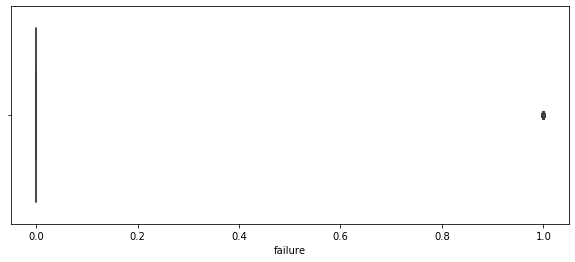

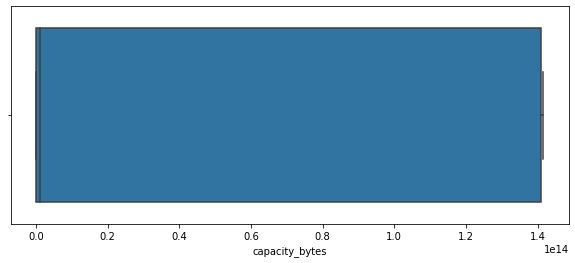

In [19]:
# Bot Plot of capacity_bytes and failure

plt.figure(figsize=(10,4))
sns.boxplot(x=df.failure)

plt.figure(figsize=(10,4))
sns.boxplot(x=df.capacity_bytes)

In [21]:
# Obtain the failed hard drive disks into dataframe
hd_fail_data = df[df.failure == 1]
hd_fail_data.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
72618,2019-02-01,ZCH0FEAV,ST12000NM0007,13935938,1,80.0,111435648.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83517,2019-02-01,ZCH07BEE,ST12000NM0007,13935938,1,81.0,120378656.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85456,2019-02-01,X8L0A01BF97G,TOSHIBA MG07ACA14TA,2155325762,1,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88272,2019-02-01,S300Z5S4,ST4000DM000,1009503735106,1,119.0,204378920.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19693,2019-02-02,ZCH07B11,ST12000NM0007,13935938,1,84.0,238189210.0,NaN,NaN,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
hd_fail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 72618 to 90814
Columns: 129 entries, date to smart_255_raw
dtypes: float64(124), int64(2), object(3)
memory usage: 141.2+ KB


In [29]:
hd_fail_data.notnull().count(axis=0)

date                    139
serial_number           139
model                   139
capacity_bytes          139
failure                 139
                       ... 
smart_252_raw           139
smart_254_normalized    139
smart_254_raw           139
smart_255_normalized    139
smart_255_raw           139
Length: 129, dtype: int64

In [31]:
# Find the lifetime of failed hard drives
lifetimes = []
for index, row in hd_fail_data.iterrows():
    start_date = hd_fail_data.iloc[0]['date']
    end_date = row['date']
    
    time_difference = pd.to_datetime(end_date) - pd.to_datetime(start_date)
    lifetimes.append(time_difference.days)
    
hd_fail_data['lifetime'] = lifetimes
hd_fail_data.head()

C:\Users\Kenei\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,lifetime
72618,2019-02-01,ZCH0FEAV,ST12000NM0007,13935938,1,80.0,111435648.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
83517,2019-02-01,ZCH07BEE,ST12000NM0007,13935938,1,81.0,120378656.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
85456,2019-02-01,X8L0A01BF97G,TOSHIBA MG07ACA14TA,2155325762,1,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
88272,2019-02-01,S300Z5S4,ST4000DM000,1009503735106,1,119.0,204378920.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19693,2019-02-02,ZCH07B11,ST12000NM0007,13935938,1,84.0,238189210.0,NaN,NaN,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [32]:
filtered_hd_fail_data = hd_fail_data[hd_fail_data.lifetime > 0]
filtered_hd_fail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 19693 to 90814
Columns: 130 entries, date to lifetime
dtypes: float64(124), int64(3), object(3)
memory usage: 138.2+ KB


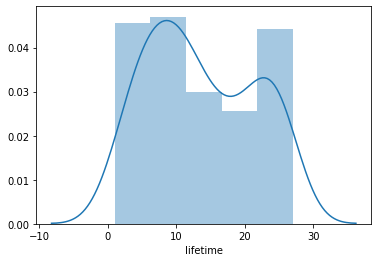

In [33]:
# Distribution of the lifetime
sns.distplot(filtered_hd_fail_data.lifetime);

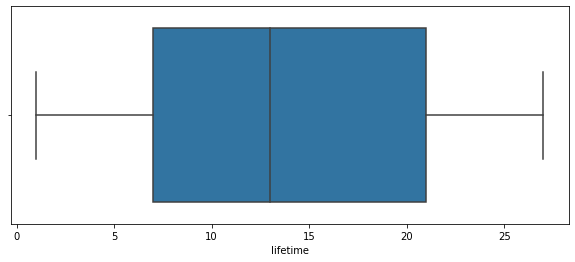

In [35]:
# Box Plot of the lifetime
plt.figure(figsize=(10,4))
sns.boxplot(x=filtered_hd_fail_data.lifetime)